Kaggle has a whole bunch of dataset
Train to get highest prediction accuracy
Ames is a college town
Each obs is a house

Goal:
•	Perform descriptive data analysis to gain business (i.e. housing market) insights
•	Build descriptive machine learning models to understand local housing market
•	Build predictive machine learning models for the local house price prediction

Close to house 

Areas of house renovated
Role:
•	You’re a housing market consultant
•	Data sceintis for online real estate database sompnay which provides house price estimation 

Want to understand the local housing market in a data driven way

Key idea to understand the local housing market

Tools you are expected to use:
•	Data analysis and missing value imputation: pandas dyplyr and the accompanying visualization tools, some linear regression or logistic regression
•	Descriptive models: feature selection, feature engineering, multiple linear regression, Python statsmodels, penalized linear regression, stepwise regression (AIC,BIC, etc.)  some gridsearchCV, KNN, SVR, Random Forest, Gradient Boosting and potentially other models
•	Predictive models:  feature selection, feature engineering , gridsearchCV, multiple/penalized linear regression, gridsearch, Gradient Boosting and potentially other models.

You can use machine learning models beyond those we list above, but don’t make these optional models your first priority.  Doing this would limit your time spend on the more fundamental part of the project.  This is not wise!

The art of feature engineering includes generating new features, or selecting optimal features to feed into the machine learning models.  If your goal is to improve accuracy, then the optimal features would mean the feature combination that offers the highest predictive accuracy.  However, if your goal is to fit an optimal descriptive model for the purpose of improving business efficiency/profitability, the most accurate model might not give you the insights you want. 

As a modeler, you need to gauge which is most appropriate based on your objectives.
Clever ideas for feature generation are often inspired by high quality data analysis.  Thus, we will suggest a few research questions to point you in the right direction.  Chronologically, your team should work on data analysis and modeling simultaneously.  Do not wait to start modeling until after you complete your data analysis phase, you will be pressed for time.

Focus on linear models

Use address to get long lat to calculate distances from various places use geopy. 
Range of dates 2006 to 2010 
Calculate price per square foot as a feature
Sale 



In [3]:
import numpy as np
import pandas as pd
%matplotlib inline

train = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp August\Machine Learning Project\original data\train.csv') 
test = pd.read_csv(r'C:\Users\dgarb\OneDrive\Documents\Data Science Bootcamp August\Machine Learning Project\original data\test.csv') 

#need to predict SalePrice which isn't here

In [4]:
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [1]:
missing = train.isnull().sum(axis=0)


NameError: name 'train' is not defined

In [24]:
price = train['SalePrice']
size_related = train.filter(regex = 'SF|Area$') #all columns with Sf or Area
size_related.head()

,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,PoolArea
0,8450,196.0,706,0,150,856,856,854,0,1710,548,0,61,0
1,9600,0.0,978,0,284,1262,1262,0,0,1262,460,298,0,0
2,11250,162.0,486,0,434,920,920,866,0,1786,608,0,42,0
3,9550,0.0,216,0,540,756,961,756,0,1717,642,0,35,0
4,14260,350.0,655,0,490,1145,1145,1053,0,2198,836,192,84,0


In [25]:
size_related.isnull().sum(axis=0)  #this isn't right #Masonary Veneer 

LotArea         0
MasVnrArea      8
BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
LowQualFinSF    0
GrLivArea       0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
PoolArea        0
dtype: int64

<AxesSubplot:>

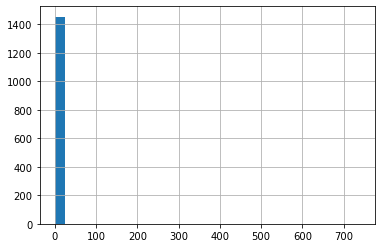

In [42]:
size_related.PoolArea.hist(bins=30)

In [37]:
#set missing value of MasVnrArea to zero for simplicity
size_related = size_related.fillna(0.0)

#Performing Unary Feature Selection

#We can use F-test to see which feature are most importand (using their p-value).  This inspects the strength of Pearson correlations of the geatures with SalePrice

In [38]:
#size_related = size_related.fillna(0.0) #We fill very minor missing values by 0.0
from sklearn.feature_selection import f_regression
F_values,p_values = f_regression(size_related, train['SalePrice'])

pd.Series(p_values, index = size_related.columns).sort_values()

GrLivArea       4.518034e-223
GarageArea      5.265038e-158
TotalBsmtSF     9.484229e-152
1stFlrSF        5.394711e-147
MasVnrArea       4.100461e-82
BsmtFinSF1       3.394110e-53
WoodDeckSF       3.972217e-37
2ndFlrSF         5.764335e-36
OpenPorchSF      3.493374e-35
LotArea          1.123139e-24
BsmtUnfSF        1.182976e-16
PoolArea         4.073490e-04
LowQualFinSF     3.282073e-01
BsmtFinSF2       6.639987e-01
dtype: float64

<AxesSubplot:>

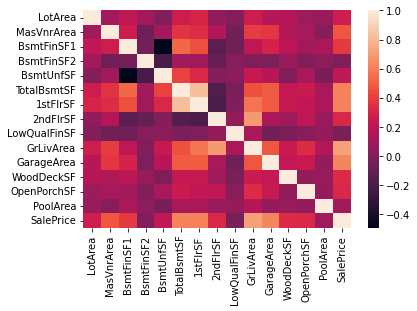

In [43]:
from matplotlib import pyplot as plt
import seaborn as sns
corr = pd.concat([size_related, train['SalePrice']], axis=1).corr()
sns.heatmap(corr)

GRLivArea

Most of the size-related columns have significant p-values on their correlations with SalePrice.  The Gross Living Area(GrLivArea) has a vanishing p-value, which indicates a very strong statistical relationship.  We will focus our research on GrLivArea.

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

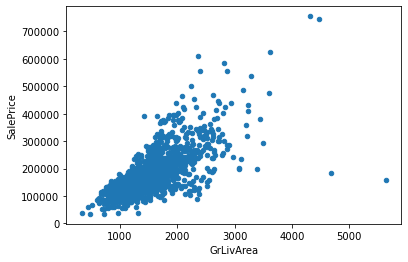

In [16]:
train[['GrLivArea','SalePrice']].plot(kind = 'scatter', x='GrLivArea', y = 'SalePrice')#ground floor living area
#see if can check leverage in Python

A Large Variation in Price/SqrFt

The scatterplot above displays a fan-like structure which widens for larger and more expensive houses.  Considering straight lines through the origin, the slopes of these lines indicate the price per square-foot.

The above pliot suggest a wide range of  price/foot^2 among the houses in Ames.  If we fit a naive simple linear model, the constant assumportion of simple linear regression would be seriously violated.

The question is: how do we model this effectively?  Luckily, pandas scatterplot has logx and logy arguments which give us an important hint

Text(0.5, 0, 'log(GrLivArea)')

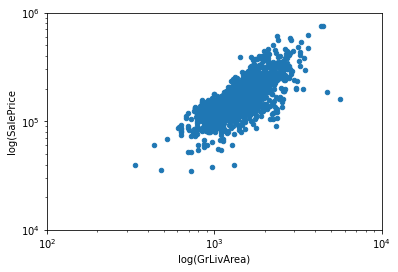

In [44]:
from matplotlib import pyplot as plt
train[['GrLivArea','SalePrice']].plot(kind ='scatter',x='GrLivArea', y = 'SalePrice', logx=True, logy=True)
plt.ylim(1e4,1e6) #1 * 10^4
plt.xlim(1e2,1e4)
plt.ylabel(('log(SalePrice'))
plt.xlabel('log(GrLivArea)')

#After taking the log-log scatterplot, the fan-like structure disappears and the scatterplot can be approximated by a parallel family of line segments.

    log(SalePrice) ~ Beta * log(SF) + gamma + epsilon

Gmma is intercept, epsilon is the residuals or error.

By using these two idenetities :

        log(ab) = log(a) + log(b)
        Beta * log(a) = log(a^Beta)

We can recast the relationship into a multiplicative relationship between the price and sqare footage:

        Price ~ e^gamma * SF^Beta * e^epsilon

The log-log relationship between the house price and square footage suggests that house price follows a power relationship with respect to square footage.

We can divide Sf from both sides of the wquation to give us:

    Price/SF = Const * SF^(beta-1) * e^epsilon

This tells us that price/sqrft appears naturallyy in our derivation.  This should be your focat point from the theoretical point of view.  This is usually a metric used to gauge the housing market.  Even people without data sccience training can identify this as an impotant factor.

**insert graph

If Beta is greater than 1, the price will increase exponentially as the square footage increases.  If Beta is less than 1, the price will eventually taper off as the square footage increases.



In [30]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
GrvLivArea = size_related[['GrLivArea']]


In [33]:
lm.fit((GrvLivArea),(price))
lm.score((GrvLivArea), (price))

0.5021486502718042

In [45]:
lm.fit(np.log(GrvLivArea), np.log(price))
lm.score(np.log(GrvLivArea), np.log(price))

0.5332721476985478

The Meaning of the Log-Log Linear Model

From model goodness of fit standpoin, the log-log linear model offers a slightly better description of the data.  We would like to study the meaning of the model.

What are ther interpretations of the model intercept and slope?  Unlike the original linear model which depicts thatt the sale price is proportional to the house gross living area, the log-log linear model offers totally different insights

In [36]:
lm.intercept_, lm.coef_  #intercept has evertything else is the remainder is all the other features
#intercept is the sales price when all features are zero

(5.668124685984315, array([2.01369225]))

Schematically, the above log-log linear regression can be expressed as 
    
    log(price) = Beta_zero + Beta_one * log(area) + epsilon

or eequivalently,

    price = price =  ^Beta_zero * area^Beta_one * 10^epsilon
    
which we can then use to plug in our values 

    price/area = 10^2.44 * area^-0.12 * 10^epsilon
    
This suggests an approximate formulat for price/f^2, which has been the yard-stick for all the housing transactions.  Note that the negative exponent -0.12 above the area variable is Beta_one - 1.  The above formula suggests that price/ft^2 would drop for larger houses.  In your data analytics, you should investigate a plausible reason for this price drop.
    
    

In [48]:
Nbr_quantile = train.groupby('Neighborhood')['GrLivArea'].quantile(0.8)
joint_Nbr_quantile = pd.merge(train[['Neighborhood']], Nbr_quantile, how='left', left_on ='Neighborhood', right_index=True)

In [57]:
smaller_home = GrvLivArea.GrLivArea < joint_Nbr_quantile.GrLivArea#style guide for Python pep 8
lm.fit(np.log10(GrvLivArea)[smaller_home], np.log10(price)[smaller_home])
lm.intercept_, lm.coef_

(2.1315792711305583, array([0.98403959]))

In [58]:
lm.score(np.log10(GrvLivArea)[smaller_home], np.log10(price)[smaller_home])

0.5501449046768988

The above suggests that, for smaller homes (the bottom 80% according to GrLivArea),the relationship between price and area is constant (independent of area).

In [60]:
lm.fit(np.log10(GrvLivArea)[~smaller_home],np.log10(price)[~smaller_home])
lm.intercept_, lm.coef_

(1.6560349214226115, array([1.10483474]))

In [61]:
lm.score(np.log10(GrvLivArea)[~smaller_home],np.log10(price)[~smaller_home]) #doesn't have the same linear relationship 
#doesn't have as strong of a linear relationship as the smaller homes

0.38781415593486823

In [68]:
GrvLivArea['ratio'] = price/GrvLivArea['GrLivArea']
#not that valuable

<AxesSubplot:xlabel='GrLivArea', ylabel='ratio'>

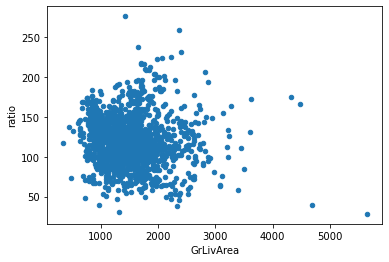

In [69]:
GrvLivArea[['GrLivArea','ratio']].plot(kind = 'scatter', x='GrLivArea', y = 'ratio')#ground floor living area.
#not showing anything at all

In [64]:
type(GrvLivArea)

pandas.core.frame.DataFrame

In [65]:
GrvLivArea.columns

Index(['GrLivArea'], dtype='object')

For larger homes(the remainging 20%) the relationship changes.  We see that the square footage will have diminishing retruns on the price.

**insert graph  #the price per square foot for larger homes is lower

#The Price Pressure On Larger Homes

The homes with living areas below the 80% quantile on average follow a very simple relationsip 
        
    price/area ~ 29.5 * area^0.16
    
which is about $105 for a 25OO square-foot home.

This discount, or price pressure on larger homes is why Beta_one ~ 0.88 if we aggregate all the homes toghather.  In your data analysis, you should provide some clues about the origin of this price discount.

#A Reflection on the Various Choices in Modeling and Model Interpretation

Machine learning models help us to formulate Ames house prices schematicalyy as price = 

    F(feature1,feature2,...epsion)
    
where epsio represents the residuals.  As a modeler, you shape your model by deciding the features involved and the form of the function F. is the relationship in the data linear or highly non-llinear?

Naively, we may try to model the house price in terms of 

    price ~ Beta_one * area + Beta_aero + epsilon
    
Within this context, Beta_one has the meaning of price. square foot and Beta_zero is the residual value (land, pavement, deck, pool, etc.) of the house when the building disappears.

The expanding fan-like structure of the scatter plot implies very large residuals for larger homes.  This makes the model a good approximation of the reality only when the house is very small.

On the other hand, we could fit either:
    
    log(price) ~ Beta_one * area + Beta_zero + espsilon)
    log(price) ~ Beta_one * log(area) + Beta_zero + espsilon)

What are the Major Implications of These Model Choices?

The former suggests :        
    
    price ~ e^Beta_one * area(e^(epsilon + Beta_zero).)
    
which treats the area (GrLivArea attribute as as a dispensible attribaute of a house.  Even if area = 0, the home price fluctuates around a fixed residual value.  The latter suggests:

    price ~ area^Beta_son

which implies that the house value vanishes if the house has NO gross living area at all.

This suggests a general principle of interpretation:

If we we run a simple linear regression of a feature (after suitable feature engineering),

    log(price) ~ Beta * feature + Beta_aero + epsion 
    
would imply 

    price~e^(Beta*feature) * (e^(Beta_zero + epsilon)
    
    
which treats the feature as an optional attribute of the house.

SEE PICTURE
    
if beta_one = o then the interceopt is the property 

In modeling Ames house prices using linear regression, your model design should be built upon your solid rationale for the dynamics of the local housing market.  This observation suggests that for the sake of simplicity of interpreation, it is better to group multiple highly correlated features together instead of treating them as separate features.  This in perfect agreement with the need to drop the feature dimension to reduce multi-collinearity (in the Ames data set, we have over 80 features).

In [ ]:
suggest getting focus on both predicting and descripive R^2 of 0.6 or 0.7 RMse 0.2

In [ ]:
don't spend too much on gridsearch

In [ ]:
see pictures



Downloading the Lat-Long Coordinates with geopy

* pip install geopy
* Use rate_limiter to slow down the download speed

In [71]:
# pip install geopy

In [74]:

import geopy
from geopy import Nominatim
from geopy.extra.rate_limiter import RateLimiter

locator = Nominatim(user_agent="myGeocoder")
#location = locator.geocode("Champ de Mars, Paris, France")

Wrap the raw geocoder in a rate-limiter to prevent it from being blocked

In [75]:
geocode = RateLimiter(locator.geocode, min_delay_seconds=1.5)

In [77]:
# location = geocode('1531 Curtiss Ave, Ames, USA')  #DID NOT WORK

Given a list (or series of street addresses or NaN values) in Ames Iowa:

In [ ]:
locations = [geocode(addr', Ames, USA') if type(addr)==str else None for addr in stree_addresses]